# TMM stability against number of ground truth components

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
import jax

import jax.random as jrandom
import numpy as np
import matplotlib.pyplot as plt
import studenttmixture
import scipy
import tqdm
import sklearn.mixture

# own code
import corc.datasets2d
# import src.corc.datasets_refactor as datasets2d
from corc.graph_metrics import tmm_gmm_neb
import corc.tmm_plots as tmm_plots
import corc.utils

# Testing Stability

In [10]:
datasets = corc.datasets2d.DATASETS
print(f"there are {len(datasets)} datasets")

dataset_name = 'Aniso Blobs'
data_X, data_y = datasets[dataset_name]()
print(f'current dataset has {len(set(data_y.tolist()))} classes')

there are 19 datasets
current dataset has 3 classes


In [4]:
datasets

{'Clusterlab1': <function corc.datasets2d.clusterlab_dataset1() -> 'tuple[np.ndarray, np.ndarray]'>,
 'Clusterlab2': <function corc.datasets2d.clusterlab_dataset2() -> 'tuple[np.ndarray, np.ndarray]'>,
 'Clusterlab3': <function corc.datasets2d.clusterlab_dataset3() -> 'tuple[np.ndarray, np.ndarray]'>,
 'Clusterlab4': <function corc.datasets2d.clusterlab_dataset4() -> 'tuple[np.ndarray, np.ndarray]'>,
 'Clusterlab5': <function corc.datasets2d.clusterlab_dataset5() -> 'tuple[np.ndarray, np.ndarray]'>,
 'Clusterlab6': <function corc.datasets2d.clusterlab_dataset6() -> 'tuple[np.ndarray, np.ndarray]'>,
 'Clusterlab7': <function corc.datasets2d.clusterlab_dataset7() -> 'tuple[np.ndarray, np.ndarray]'>,
 'Clusterlab8': <function corc.datasets2d.clusterlab_dataset8() -> 'tuple[np.ndarray, np.ndarray]'>,
 'Clusterlab9': <function corc.datasets2d.clusterlab_dataset9() -> 'tuple[np.ndarray, np.ndarray]'>,
 'Clusterlab10': <function corc.datasets2d.clusterlab_dataset10() -> 'tuple[np.ndarray, np.

In [22]:

def train_multiple_tmm_models(data_X, data_y, num_models=10, cluster_start=None, cluster_end=None):
    neb_iterations=25
    
    if cluster_start is None:
        cluster_start = len(np.unique(data_y))
    if cluster_end is None:
        cluster_end = cluster_start + num_models -1 # linspace includes start and end value


    tmm_models = list()
    for num_components in np.linspace(cluster_start,cluster_end,num_models,dtype=int):
        tmm_model = corc.graph_metrics.neb.NEB(
            latent_dim=2,
            data=data_X,
            labels=data_y,
            optimization_iterations=neb_iterations,
            seed=42,
            n_init=5,
            n_components=num_components,
        )
        tmm_model.fit(data=data_X)
        tmm_models.append(tmm_model)

    return tmm_models


After filtering 3 components, we are left with 3 components


tmm: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


After filtering 6 components, we are left with 4 components


tmm: 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]


After filtering 9 components, we are left with 6 components


tmm: 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]


After filtering 12 components, we are left with 8 components


tmm: 100%|██████████| 28/28 [00:12<00:00,  2.33it/s]


After filtering 15 components, we are left with 11 components


tmm: 100%|██████████| 55/55 [00:25<00:00,  2.14it/s]


After filtering 18 components, we are left with 11 components


tmm: 100%|██████████| 55/55 [00:24<00:00,  2.28it/s]


After filtering 21 components, we are left with 12 components


tmm: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]


After filtering 24 components, we are left with 13 components


tmm: 100%|██████████| 78/78 [00:38<00:00,  2.01it/s]


After filtering 27 components, we are left with 17 components


tmm: 100%|██████████| 136/136 [01:08<00:00,  1.99it/s]


After filtering 30 components, we are left with 18 components


tmm: 100%|██████████| 153/153 [01:20<00:00,  1.90it/s]


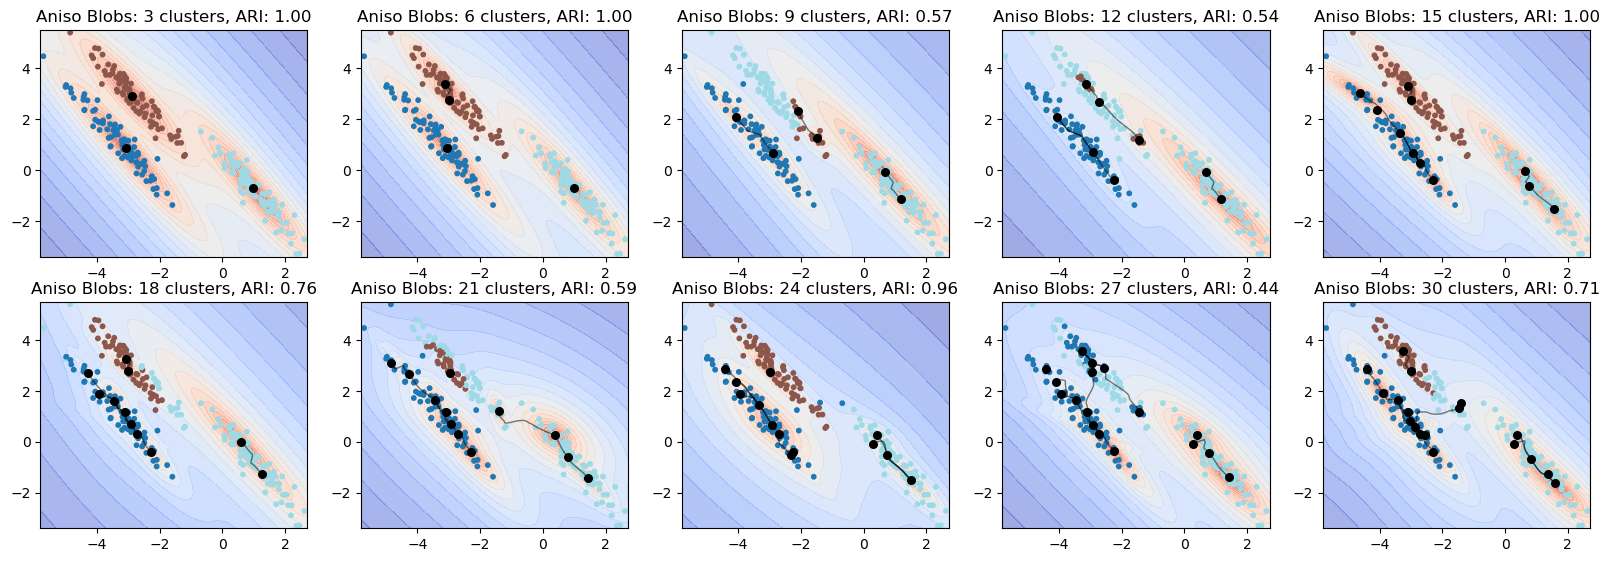

In [23]:
tmm_models = train_multiple_tmm_models(data_X, data_y, cluster_end=30)

figure = tmm_plots.plot_tmm_models(tmm_models, data_X, data_y, dataset_name)

# Playground wrt stability

In [17]:
tmm_models[9].mixture_model.mix_weights

array([0.00919669, 0.12951509, 0.2023171 , 0.02869855, 0.10506921,
       0.10703815, 0.01395982, 0.21785686])